## Importing Libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [4]:
data=pd.read_csv("data_for_lr.csv")

### A little bit of data exploration

In [5]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [6]:
data.isnull()

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
695,False,False
696,False,False
697,False,False
698,False,False


# Data Preprocessing

### handling null values

In [7]:
data=data.dropna()
print("Shape of the dataset = {}".format(data.shape))

Shape of the dataset = (699, 2)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


### splitting data

In [9]:
#training datasets and labels
train_input=np.array(data.x[0:500]).reshape(500,1)
train_output=np.array(data.y[0:500]).reshape(500,1)

#valid dataset and labels
test_input=np.array(data.x[500:700]).reshape(199,1)
test_output=np.array(data.y[500:700]).reshape(199,1)

#print the shapes
print("train input shape={}".format(train_input.shape))
print("train output shape={}".format(train_output.shape))
print("test input shape={}".format(test_input.shape))
print("test output shape={}".format(test_output.shape))

train input shape=(500, 1)
train output shape=(500, 1)
test input shape=(199, 1)
test output shape=(199, 1)


# <font color="green">Linear Regression</font>

## Forward Propagation

f(x)=m*x +c, where m and c are parameters that our model will learn through training

In [10]:
def forward_propagation(train_input,parameters):
    m=parameters['m']
    c=parameters['c']
    predictions=np.multiply(m, train_input)+c
    return predictions

# Defining Cost Function

### Mean squared error,cost=1/2n*(y-f(x)^2)*0.5

where y are the actual values and f(x) is the predicted values.

In [11]:
def Cost_function(predictions,train_output):
    cost=np.mean((train_output-predictions)**2)*0.5
    return cost

# Defining Gradient Descent for backpropagation


using chain rule

*cost
*f=f(x)
Partial Derivative of cost function w.r.t m <b>dcost/dm = dcost/df * df/dm</b>

Partial Derivative of cost function w.r.t c <b>dcost/dc = dcost/df * df/dc</b>

Partial Derivatives:

df=summ(f(x)-y)/n

dm=df*x

dc=df*1

In [24]:
def backwards_propagation(train_input,train_output,predictions):
    derivatives=dict()
    df=(train_output-predictions)*-1
    dm=np.mean(np.multiply(train_output,df))
    dc=np.mean(df)
    
    derivatives['dm']=dm
    derivatives['dc']=dc
    return derivatives
    

# update the parameters

m=m-(learning_rate*dm)

c=c-(learning_rate*dc)

In [13]:
def update_parameters(parameters,derivatives,learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

# Train the data

Sequence of Steps:
   - Forward Propagation
   - Cost Function
   - Backward Propagation
   - Update Parameters

In [27]:
def train(train_input, train_output, learning_rate, iters):
    parameters=dict()
    parameters["m"]=np.random.uniform(0,1) *-1
    parameters["c"]=np.random.uniform(0,1) *-1
    
    plt.figure()
    
    #loss
    
    loss=list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = Cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, loss = {}".format(i+1,cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')
        
        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions,'*')
        
        plt.show()
        
        #back propagation
        derivatives = backwards_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

# Training

Iteration = 1, loss = 4965.854551672298


<Figure size 432x288 with 0 Axes>

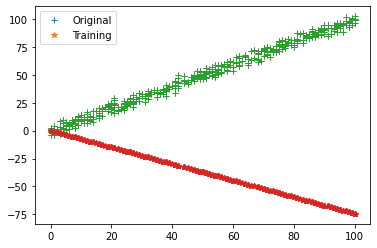

Iteration = 2, loss = 2257.767303049457


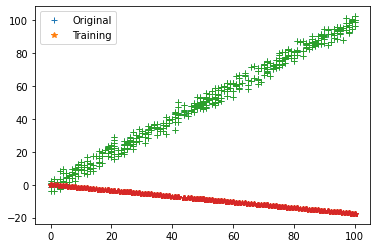

Iteration = 3, loss = 1027.0178295169646


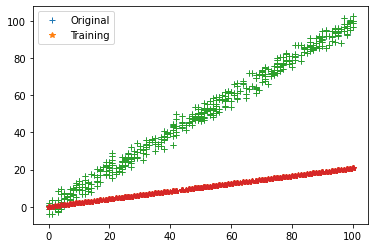

Iteration = 4, loss = 467.8923336724135


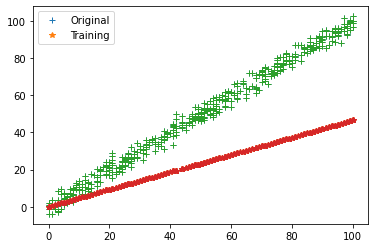

Iteration = 5, loss = 214.0288972989981


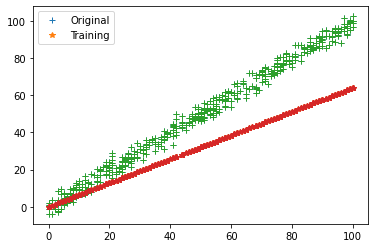

Iteration = 6, loss = 98.86382563096439


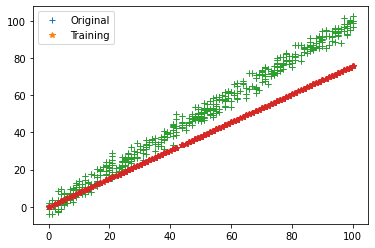

Iteration = 7, loss = 46.685581637468566


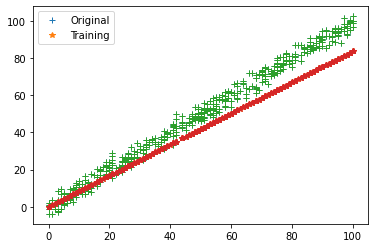

Iteration = 8, loss = 23.08986938776086


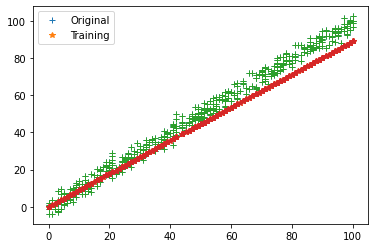

Iteration = 9, loss = 12.449944333486751


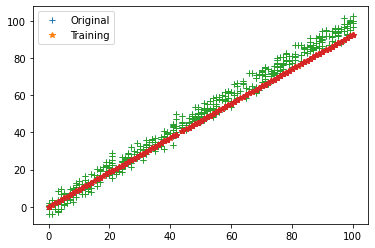

Iteration = 10, loss = 7.67272872696224


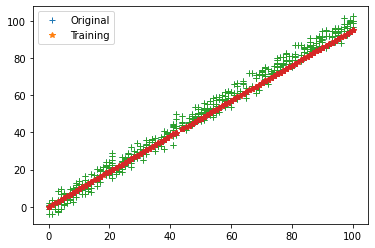

Iteration = 11, loss = 5.541825592568928


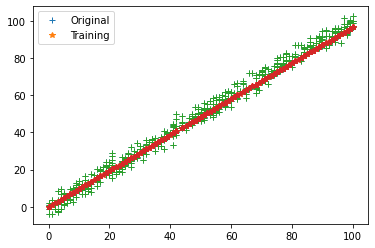

Iteration = 12, loss = 4.6009007998965545


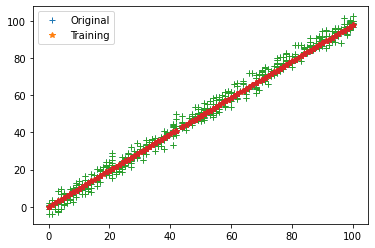

Iteration = 13, loss = 4.192009981104131


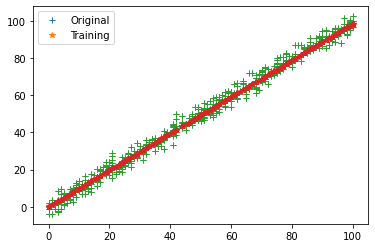

Iteration = 14, loss = 4.018895954184456


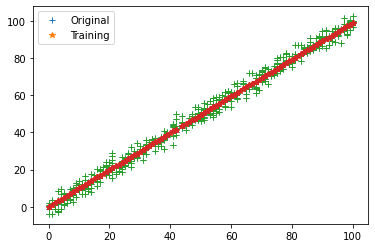

Iteration = 15, loss = 3.9488329217153146


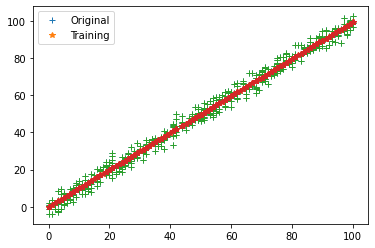

Iteration = 16, loss = 3.922816350908728


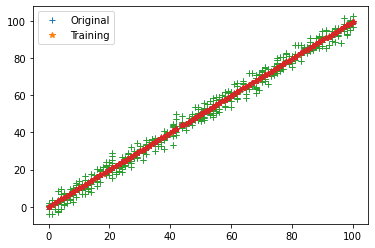

Iteration = 17, loss = 3.914928644345855


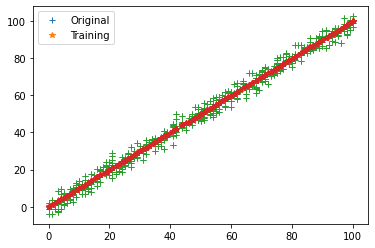

Iteration = 18, loss = 3.914001831494594


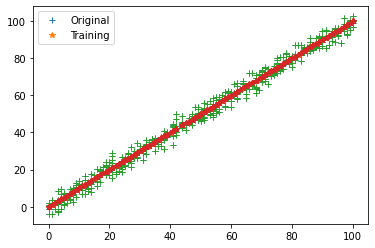

Iteration = 19, loss = 3.915374631968209


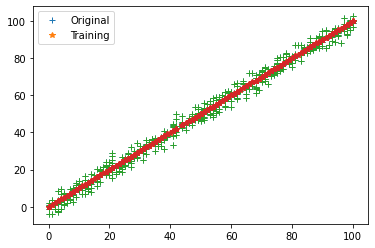

Iteration = 20, loss = 3.917209038117261


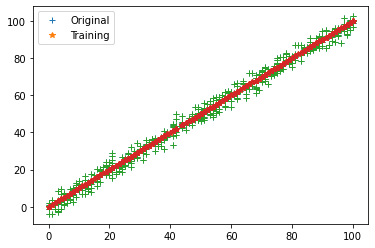

In [28]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [29]:
print(parameters)

{'m': 1.000204421695542, 'c': -0.06839102154766735}


# Let's Predict

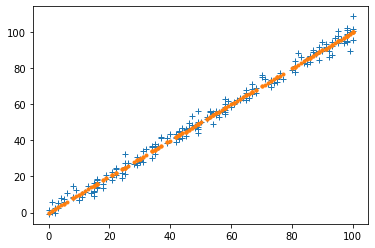

In [30]:
test_predictions = test_input*parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

# Cost for test data

In [33]:
Cost_function(test_predictions, test_output)

3.9723728990201077

In [ ]:
#so the correct value will lie in range of predictions+-cost